In [45]:
input_size = 2
hidden_size = 4
output_size = 1
epoch = 5
hidden_input = 0.0
hidden_output = 0.0
final_input = 0.0
final_output = 0.0

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [47]:
def sigmoid(x):
    z = 1/(1+ np.exp(-x))
    return z

In [48]:
def derSigmoid(x):
    a = sigmoid(x)
    b = (1- sigmoid(x))
    return a*b

In [49]:
X = np.random.randint(10, size=(100,2)) #from -10 to 10 we want 100 values
y = np.random.randint(1, size=(100,1)) # as sigmoid function is from 0 to 1 and we have 100 inputs

In [57]:
print("Input : ", X, sep = "\n")
print("Output :", y)

Input : 
[[4 9]
 [1 0]
 [7 8]
 [3 4]
 [4 1]
 [7 4]
 [0 6]
 [2 2]
 [1 4]
 [3 7]
 [7 2]
 [8 7]
 [0 6]
 [4 1]
 [8 2]
 [0 9]
 [3 7]
 [3 9]
 [2 2]
 [5 3]
 [4 9]
 [1 2]
 [2 5]
 [8 9]
 [8 0]
 [9 8]
 [8 6]
 [6 2]
 [3 8]
 [8 9]
 [6 5]
 [6 4]
 [8 5]
 [6 4]
 [5 8]
 [7 4]
 [9 4]
 [4 5]
 [0 9]
 [8 2]
 [5 5]
 [8 0]
 [6 2]
 [7 0]
 [1 9]
 [1 6]
 [4 0]
 [6 3]
 [7 8]
 [7 0]
 [4 0]
 [4 1]
 [4 3]
 [1 0]
 [2 5]
 [6 9]
 [6 2]
 [6 3]
 [3 1]
 [4 7]
 [4 3]
 [7 6]
 [6 6]
 [9 4]
 [9 4]
 [5 1]
 [4 7]
 [5 1]
 [4 6]
 [3 3]
 [1 2]
 [2 1]
 [6 2]
 [6 4]
 [1 2]
 [1 5]
 [6 3]
 [4 4]
 [8 9]
 [1 5]
 [7 3]
 [5 7]
 [3 4]
 [0 5]
 [1 2]
 [2 5]
 [1 1]
 [7 6]
 [4 7]
 [8 9]
 [9 8]
 [7 4]
 [4 6]
 [1 7]
 [7 5]
 [3 1]
 [9 6]
 [4 7]
 [0 8]
 [7 2]]
Output : [[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 

In [51]:
weights_input_hidden = np.random.randn(input_size, hidden_size)
weights_hidden_output = np.random.randn(hidden_size, output_size)

In [52]:
bias_hidden = np.zeros((1,hidden_size))
bias_output = np.zeros((1,output_size))

In [53]:
#forward propogation
learning_rate = 0.1
losses = []

for i in range(epoch):
    # Forward pass
    hidden_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_output = sigmoid(hidden_input)
    final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
    final_output = sigmoid(final_input)
    
    # Calculate loss
    error = final_output - y
    loss = np.mean(error ** 2)
    losses.append(loss)
    
    # Backward propagation
    d_output = error * derSigmoid(final_input)
    
    # Hidden layer gradient
    d_hidden = np.dot(d_output, weights_hidden_output.T) * derSigmoid(hidden_input)
    
    # Calculate gradients for weights and biases
    dW_hidden_output = np.dot(hidden_output.T, d_output)
    dB_output = np.sum(d_output, axis=0, keepdims=True)
    
    dW_input_hidden = np.dot(X.T, d_hidden)
    dB_hidden = np.sum(d_hidden, axis=0, keepdims=True)
    
    # Update weights and biases
    weights_hidden_output -= learning_rate * dW_hidden_output
    bias_output -= learning_rate * dB_output
    weights_input_hidden -= learning_rate * dW_input_hidden
    bias_hidden -= learning_rate * dB_hidden
    
    print(f"Epoch {i+1}/{epoch}, Loss: {loss:.6f}")

Epoch 1/5, Loss: 0.183145
Epoch 2/5, Loss: 0.001382
Epoch 3/5, Loss: 0.001287
Epoch 4/5, Loss: 0.001204
Epoch 5/5, Loss: 0.001131


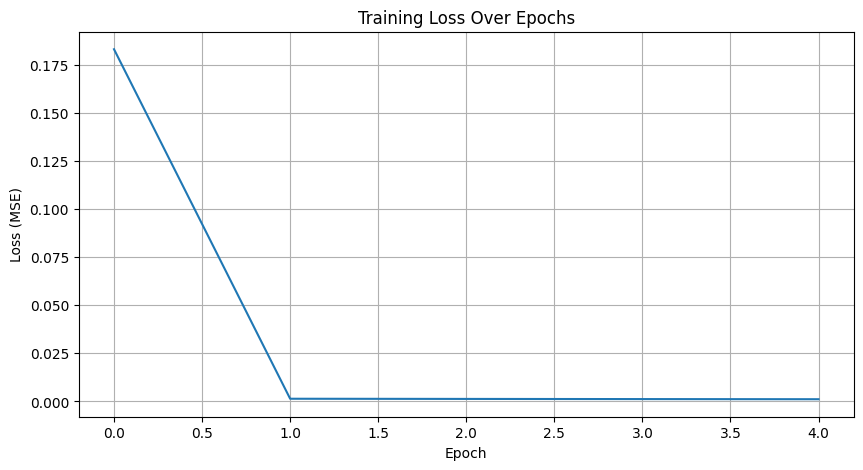


Training completed!
Final Loss: 0.001131
Final Output (first 5 samples):
[[0.02950573]
 [0.08029422]
 [0.02946484]
 [0.03085761]
 [0.03358194]]
Actual Output (first 5 samples):
[[0]
 [0]
 [0]
 [0]
 [0]]


In [54]:
# Plot the loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.grid(True)
plt.show()

print(f"\nTraining completed!")
print(f"Final Loss: {losses[-1]:.6f}")
print(f"Final Output (first 5 samples):\n{final_output[:5]}")
print(f"Actual Output (first 5 samples):\n{y[:5]}")

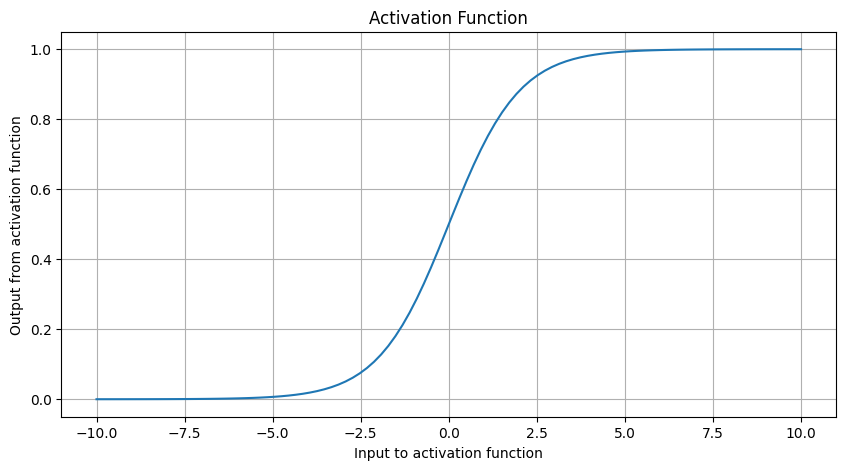

In [55]:
#activation function plot

x_axis = np.linspace(-10, 10, 100)
y_axis = sigmoid(x_axis)

plt.figure(figsize=(10,5))
plt.plot(x_axis,y_axis)
plt.title("Activation Function")
plt.xlabel("Input to activation function")
plt.ylabel("Output from activation function")
plt.grid(True)
plt.show()

In [ ]:
# Loss Landscape Visualization
from mpl_toolkits.mplot3d import Axes3D

print("Generating loss landscape by varying weights...")

# Vary two weights: first output weight and bias
weight_1_range = np.linspace(weights_hidden_output[0, 0] - 2, weights_hidden_output[0, 0] + 2, 40)
weight_2_range = np.linspace(weights_hidden_output[1, 0] - 2, weights_hidden_output[1, 0] + 2, 40)

# Create meshgrid
W1, W2 = np.meshgrid(weight_1_range, weight_2_range)
Loss_landscape = np.zeros_like(W1)

# Calculate loss for each weight combination
for i in range(len(weight_1_range)):
    for j in range(len(weight_2_range)):
        # Temporarily update weights
        weights_hidden_output_temp = weights_hidden_output.copy()
        weights_hidden_output_temp[0, 0] = W1[j, i]
        weights_hidden_output_temp[1, 0] = W2[j, i]
        
        # Forward pass
        hidden_output_temp = sigmoid(np.dot(X, weights_input_hidden) + bias_hidden)
        final_output_temp = sigmoid(np.dot(hidden_output_temp, weights_hidden_output_temp) + bias_output)
        
        # Calculate loss
        error_temp = final_output_temp - y
        loss_temp = np.mean(error_temp ** 2)
        Loss_landscape[j, i] = loss_temp

# 3D Surface Plot
fig = plt.figure(figsize=(14, 5))

# Surface plot
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(W1, W2, Loss_landscape, cmap='viridis', alpha=0.8)
ax1.scatter([weights_hidden_output[0, 0]], [weights_hidden_output[1, 0]], 
            [np.mean((final_output - y) ** 2)], color='red', s=100, label='Trained Weights')
ax1.set_xlabel('Weight 1 (hidden→output)')
ax1.set_ylabel('Weight 2 (hidden→output)')
ax1.set_zlabel('Loss (MSE)')
ax1.set_title('Loss Landscape - 3D Surface View')
ax1.legend()
fig.colorbar(surf, ax=ax1, shrink=0.5)

# Contour plot
ax2 = fig.add_subplot(122)
contour = ax2.contourf(W1, W2, Loss_landscape, levels=20, cmap='viridis')
ax2.contour(W1, W2, Loss_landscape, levels=10, colors='black', alpha=0.3, linewidths=0.5)
ax2.scatter(weights_hidden_output[0, 0], weights_hidden_output[1, 0], 
            color='red', s=100, marker='*', label='Trained Weights', edgecolors='white', linewidth=2)
ax2.set_xlabel('Weight 1 (hidden→output)')
ax2.set_ylabel('Weight 2 (hidden→output)')
ax2.set_title('Loss Landscape - Contour View')
ax2.legend()
fig.colorbar(contour, ax=ax2, label='Loss (MSE)')

plt.tight_layout()
plt.show()

print("Loss Landscape generated successfully!")
print(f"Minimum loss in landscape: {Loss_landscape.min():.6f}")
print(f"Maximum loss in landscape: {Loss_landscape.max():.6f}")
print(f"Current training loss: {np.mean((final_output - y) ** 2):.6f}")


In [56]:
X_test = np.array([
    [1, 2],
    [3, 4],
    [5, 6],
    [7, 8],
    [9, 9],
    [2, 3],
    [4, 5],
    [6, 7]
])


test_hidden_input = np.dot(X_test, weights_input_hidden) + bias_hidden
test_hidden_output = sigmoid(test_hidden_input)
test_final_input = np.dot(test_hidden_output, weights_hidden_output) + bias_output
test_predictions = sigmoid(test_final_input)

print(f"{'Input (X)':<20} {'Prediction':<20} {'Rounded':<20}")

for i, (inp, pred) in enumerate(zip(X_test, test_predictions)):
    rounded = 1 if pred[0] > 0.5 else 0
    print(f"{str(inp):<20} {pred[0]:<20.6f} {rounded:<20}")

print("\nModel Statistics:")
print(f"Prediction range: [{test_predictions.min():.6f}, {test_predictions.max():.6f}]")
print(f"Average prediction: {test_predictions.mean():.6f}")
print(f"Predictions > 0.5: {np.sum(test_predictions > 0.5)} out of {len(test_predictions)}")


Input (X)            Prediction           Rounded             
[1 2]                0.041977             0                   
[3 4]                0.029932             0                   
[5 6]                0.028736             0                   
[7 8]                0.028584             0                   
[9 9]                0.028566             0                   
[2 3]                0.032621             0                   
[4 5]                0.029046             0                   
[6 7]                0.028625             0                   

Model Statistics:
Prediction range: [0.028566, 0.041977]
Average prediction: 0.031011
Predictions > 0.5: 0 out of 8
